In [1]:
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Hannanum
import pandas as pd
import numpy as np
import re

In [2]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
import platform

path = "C:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

In [ ]:
iscream7_10 = pd.read_csv('아이스크림 에듀 라벨링.csv', encoding = 'cp949')
iscream7_10 = iscream7_10.iloc[:, 1:]
iscream7_10

In [ ]:
# 결측치 제거
iscream7_10 = iscream7_10.dropna()
iscream7_10

In [ ]:
# 한글과 공백을 제외하고 모두 제거
iscream7_10['text'] = iscream7_10['text'].str.replace('[^가-힣 ] ', '')
iscream7_10

In [11]:
# 공백이나 값이 없다면 null로 변경 후 결측치 재확인
iscream7_10['text'] = iscream7_10['text'].str.replace('^ +', '')
iscream7_10['text'].replace('', np.nan, inplace = True)
iscream7_10.dropna(inplace=True)
print(iscream7_10.isnull().sum())

name        0
title       0
text        0
star        0
date        0
category    0
label       0
dtype: int64


C:\Users\kgyal\AppData\Local\Temp\ipykernel_29732\2236994689.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  iscream7_10['text'] = iscream7_10['text'].str.replace('^ +', '')


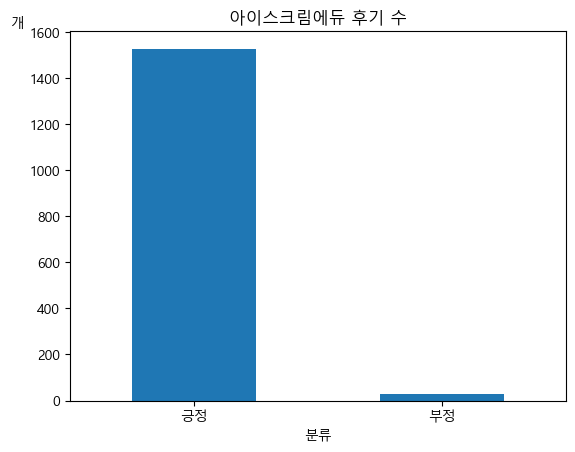

In [12]:
# 아이스크림에듀 후기 수
iscream7_10['label'].value_counts().plot(kind = 'bar')
plt.title('아이스크림에듀 후기 수')
plt.ylabel('개', loc = 'top', rotation = 0)
plt.xlabel('분류')
plt.xticks([0, 1], ['긍정', '부정'], rotation = 0)
plt.show()

In [13]:
print(iscream7_10.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0     30
1      1   1530


In [14]:
pos = iscream7_10[iscream7_10['label'] == 1].reset_index(drop=True)
neg = iscream7_10[iscream7_10['label'] == 0].reset_index(drop=True)

## 필터링 전
* 불용어 리스트 불러오기

In [15]:
f = open('불용어.txt', 'r', encoding = 'utf-8')
stopwords = f.read().split('\n')
f.close()

In [16]:
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [17]:
okt = Okt()

In [18]:
okt.morphs([sentence for sentence in pos['text']][0])

['유익한', '연수', '였습니다', '.']

* 긍정 리뷰 단어 빈도 수

In [19]:
pos_df = []

for sentence in pos['text']:
    
    try:
        morphs = okt.morphs(sentence)
        stopwords_removed_morphs = [word for word in morphs
                                   if not word in stopwords]
        pos_df.append(stopwords_removed_morphs)
        
    except:
        continue

In [33]:
pos_df_dict = dict()

for pos in pos_df:
    
    for pos_word in pos:        
        
        if len(pos_word) == 1:
            continue
        if pos_word not in pos_df_dict:
            pos_df_dict[pos_word] = 0

        pos_df_dict[pos_word] += 1

In [34]:
pos_df_dict

{'유익한': 142,
 '연수': 1274,
 '였습니다': 270,
 '브루': 17,
 '궁금하기만': 1,
 '했는데': 61,
 '이렇게': 27,
 '듣고': 83,
 '나니': 8,
 '정말': 155,
 '좋구나': 1,
 '해볼': 14,
 '있겠다라는': 1,
 '자신감': 30,
 '생겼어요': 3,
 '실천': 44,
 '해봐야겠다는': 4,
 '생각': 322,
 '필요한': 75,
 '공부': 115,
 '방법': 122,
 '이라는': 42,
 '들었어요': 18,
 '알차다고': 1,
 '느낀': 4,
 '다양한': 166,
 '주제': 33,
 '가지': 61,
 '직접': 32,
 '수업': 271,
 '하는': 305,
 '모습': 35,
 '보여주셨기': 1,
 '때문': 19,
 '현장': 55,
 '적용': 78,
 '있을': 60,
 '같습니다': 113,
 '생동감': 3,
 '넘치는': 3,
 '강의': 305,
 '감사합니다': 254,
 '^^': 68,
 '스페인어': 15,
 '보고': 64,
 '싶다고': 1,
 '막연하게': 5,
 '했었는데': 6,
 '통해': 159,
 '이나마': 9,
 '되어': 108,
 '너무': 140,
 '기쁩니다': 4,
 '특히': 47,
 '내용': 257,
 '알차고': 10,
 '강사': 98,
 '유쾌하셔서': 1,
 '지루하지': 14,
 '않게': 8,
 '계속': 21,
 '반복': 33,
 '해서': 94,
 '있습니다': 52,
 '독학': 2,
 '일본어': 5,
 'JLP': 1,
 '여름': 13,
 '취득': 2,
 '했지만': 14,
 '시험': 53,
 '위주': 13,
 '했기에': 1,
 '궁금한': 3,
 '많았는데': 16,
 '그런': 11,
 '궁금증': 5,
 '많이': 205,
 '해소': 1,
 '고마운': 1,
 '입니다': 180,
 '문법': 13,
 '구성': 33,
 '여기있는': 1,
 '술술': 3,
 '있도록': 

In [22]:
freq_pos = sorted(pos_df_dict.items(), key=lambda x: x[1], reverse = True)
freq_pos_dict = dict(freq_pos)
freq_pos_dict

{'연수': 1274,
 '있는': 377,
 '생각': 322,
 '하는': 305,
 '강의': 305,
 '하고': 294,
 '도움': 294,
 '수업': 271,
 '였습니다': 270,
 '내용': 257,
 '감사합니다': 254,
 '학생': 232,
 '좋은': 216,
 '많이': 205,
 '되었습니다': 201,
 '입니다': 180,
 '선생님': 180,
 '활용': 177,
 '이해': 176,
 '교육': 169,
 '다양한': 166,
 '교사': 162,
 '통해': 159,
 '마음': 159,
 '대해': 158,
 '되는': 156,
 '정말': 155,
 '많은': 155,
 '합니다': 154,
 '좋았습니다': 148,
 '대한': 144,
 '유익한': 142,
 '너무': 140,
 '있어서': 138,
 '추천': 129,
 '방법': 122,
 '설명': 121,
 '공부': 115,
 '같습니다': 113,
 '되어': 108,
 '들었습니다': 108,
 '부분': 103,
 '역사': 103,
 '정리': 101,
 '신청': 100,
 '강사': 98,
 '영어': 95,
 '해서': 94,
 '다시': 92,
 '하여': 91,
 '지도': 87,
 '이었습니다': 84,
 '학급': 84,
 '듣고': 83,
 '쉽게': 83,
 '하게': 82,
 '그림책': 81,
 '사용': 79,
 '이야기': 79,
 '적용': 78,
 '학교': 78,
 '놀이': 78,
 '있어': 77,
 '필요한': 75,
 '학기': 75,
 '학년': 74,
 '학습': 74,
 '실제': 73,
 '들을': 72,
 '있었습니다': 71,
 '하기': 69,
 '하며': 69,
 '^^': 68,
 '들어': 68,
 '생활': 68,
 '같아요': 68,
 '활동': 68,
 '재미있게': 67,
 '감사': 65,
 '보고': 64,
 '여러': 64,
 '고민': 64,
 '과정': 63,
 '했습니다'

* 긍정 워드클라우드

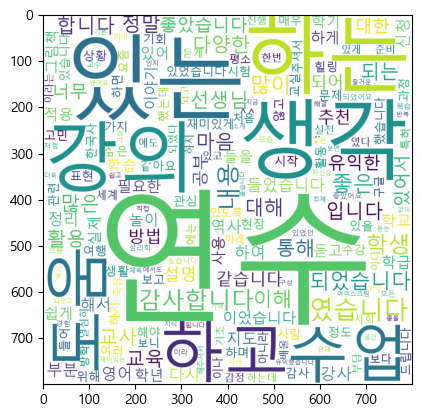

In [23]:
wc = WordCloud(font_path = path, width=400, height=400, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(freq_pos_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드긍정.png')

* 부정 리뷰 단어 빈도 수

In [24]:
neg_df = []

for sentence in neg['text']:
    
    try:
        morphs = okt.morphs(sentence)
        stopwords_removed_morphs = [word for word in morphs
                                   if not word in stopwords]
        neg_df.append(stopwords_removed_morphs)
        
    except:
        continue

In [38]:
# 딕셔너리 생성
neg_df_dict = dict()

# neg_df: 토큰화된 데이터로 이루어진 데이터프레임
for neg in neg_df:
    
    for neg_word in neg:        
        
        # 해당 토큰이 한 글자면 제외
        if len(neg_word) == 1:
            continue
        
        # 해당 토큰이 딕셔너리에 없으면 키값으로 할당
        if neg_word not in neg_df_dict:
            neg_df_dict[neg_word] = 0
        
        # 해당 토큰 개수 세기
        neg_df_dict[neg_word] += 1

In [26]:
# 빈도 수를 기준으로 내림차순 정렬
freq_neg = sorted(neg_df_dict.items(), key=lambda x: x[1], reverse = True)
freq_neg_dict = dict(freq_neg)
freq_neg_dict

{'연수': 18,
 '내용': 17,
 '강의': 11,
 '하는': 9,
 '리본': 9,
 '설명': 8,
 '이해': 7,
 '재료': 6,
 '대해': 6,
 '부분': 6,
 '적용': 6,
 '강사': 6,
 '같습니다': 5,
 '하고': 5,
 '시험': 5,
 '...': 5,
 '있는': 4,
 '도움': 4,
 '대처': 4,
 '느낌': 4,
 '영상': 4,
 '교사': 4,
 '신청': 4,
 '너무': 4,
 '전달': 4,
 '차시의': 4,
 '되어': 4,
 '생각': 4,
 '정도': 3,
 '매우': 3,
 '인데': 3,
 '다양한': 3,
 '교직': 3,
 '많은': 3,
 '아쉬웠습니다': 3,
 '이다': 3,
 '과정': 3,
 '방법': 3,
 '문제': 3,
 '하여': 3,
 '오건': 3,
 '같은': 3,
 '파일': 3,
 '마음': 3,
 '보다': 3,
 '로서': 3,
 '영어': 2,
 '에게는': 2,
 '였습니다': 2,
 '그냥': 2,
 '실무': 2,
 '없는': 2,
 '이론': 2,
 '쉽게': 2,
 '작품': 2,
 '만들어': 2,
 '좋을': 2,
 '역시': 2,
 '그대로': 2,
 '교권': 2,
 '해당': 2,
 '나오는': 2,
 '악성': 2,
 '학부모': 2,
 '상대': 2,
 '많이': 2,
 '사례': 2,
 '제시': 2,
 '여러': 2,
 '아쉬운': 2,
 '필요한': 2,
 '수업': 2,
 '있고': 2,
 '실제': 2,
 '야하는': 2,
 '현장': 2,
 '어려운': 2,
 '합니다': 2,
 '들어': 2,
 '아는': 2,
 '지도': 2,
 '의미': 2,
 '체계': 2,
 '구성': 2,
 '보다는': 2,
 '입니다': 2,
 '있게': 2,
 '있습니다': 2,
 '차시': 2,
 '머리띠': 2,
 '감는': 2,
 '시작': 2,
 '하는데': 2,
 '보이지': 2,
 '체인': 2,
 '없고': 2,
 '부족하여': 

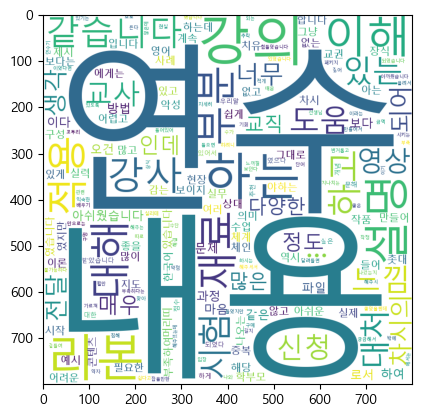

In [27]:
# 부정 워드클라우드
wc = WordCloud(font_path = path, width=400, height=400, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(freq_neg_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드부정.png')

## 필터링 후

* 공통 단어 제거

In [28]:
same = set(freq_pos_dict.keys() & freq_neg_dict.keys())

In [29]:
same = list(same)

file_name = '아이스크림공통.txt'

with open(file_name, 'w+') as file:
    file.write('\n'.join(same))   # same은 리스트 형태

* 긍정 워드클라우드

In [30]:
for s in same:
    freq_pos_dict.pop(s)
freq_pos_dict

{'감사합니다': 254,
 '활용': 177,
 '교육': 169,
 '통해': 159,
 '정말': 155,
 '좋았습니다': 148,
 '공부': 115,
 '들었습니다': 108,
 '정리': 101,
 '이었습니다': 84,
 '학급': 84,
 '듣고': 83,
 '그림책': 81,
 '사용': 79,
 '학교': 78,
 '놀이': 78,
 '학기': 75,
 '학년': 74,
 '학습': 74,
 '하며': 69,
 '^^': 68,
 '활동': 68,
 '감사': 65,
 '보고': 64,
 '해야': 63,
 '교실': 63,
 '있을': 60,
 '여행': 58,
 '하면': 58,
 '표현': 58,
 '상황': 56,
 '힐링': 56,
 '위해': 55,
 '한국사': 51,
 '주셔서': 49,
 '세계': 49,
 '보니': 48,
 '평소': 48,
 '구글': 48,
 '방학': 48,
 '특히': 47,
 '에는': 47,
 '진행': 46,
 '감정': 45,
 '한번': 45,
 '실천': 44,
 '에도': 44,
 '사회': 44,
 '미래': 44,
 '기초': 43,
 '배울': 41,
 '부담': 41,
 '하지': 39,
 '되고': 39,
 '죽음': 38,
 '좋았어요': 38,
 '되었어요': 38,
 '아주': 38,
 '싶습니다': 36,
 '흐름': 36,
 '모습': 35,
 '모든': 35,
 '심리학': 35,
 '있었던': 35,
 '처럼': 35,
 '경험': 34,
 '아이스크림': 34,
 '주제': 33,
 '지금': 33,
 '더욱': 33,
 '그림': 33,
 '관계': 33,
 '체육': 33,
 '에서도': 32,
 '소개': 32,
 '기억': 32,
 '즐거운': 32,
 '유익했습니다': 32,
 '인지': 32,
 '지식': 31,
 '없이': 31,
 '되었고': 31,
 '좋습니다': 31,
 '공간': 31,
 '쉽고': 31,
 '였어요': 31,
 '자신감': 3

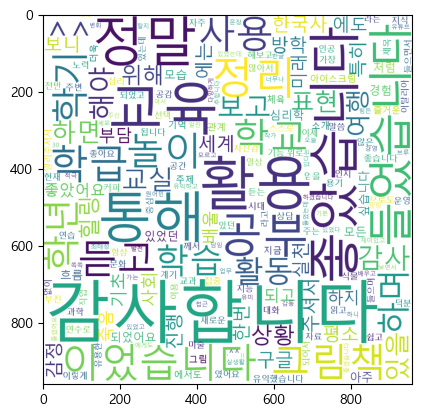

In [31]:
wc = WordCloud(font_path = path, width=480, height=480, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(freq_pos_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드긍정(필터링).png')

* 부정 워드클라우드

In [32]:
for s in same:
    freq_neg_dict.pop(s)
freq_neg_dict

{'오건': 3,
 '머리띠': 2,
 '감는': 2,
 '체인': 2,
 '장식': 2,
 '촛대': 2,
 '중복': 2,
 '약자': 1,
 '지나치는': 1,
 '해주셨는데': 1,
 '금액': 1,
 '올려서': 1,
 '번거롭고': 1,
 '작정': 1,
 '달려들면': 1,
 '만으로는': 1,
 '불가능하다': 1,
 '꼬투리': 1,
 '잡을만한': 1,
 '약점': 1,
 '될만': 1,
 '구멍': 1,
 '나갔는지': 1,
 '이었다면': 1,
 '않은데': 1,
 '지루합니다': 1,
 '검토': 1,
 '정답': 1,
 '있나요': 1,
 '거북한': 1,
 '많다': 1,
 '좋았으면': 1,
 '그랬습니다': 1,
 '평이하고': 1,
 '나열': 1,
 '25': 1,
 '피콧': 1,
 '모자랐고': 1,
 '겹치': 1,
 '감아': 1,
 '모자랐습니다': 1,
 '감기': 1,
 '보여': 1,
 '주셔야': 1,
 '잡아주셔서': 1,
 '주얼리': 1,
 '야할것': 1,
 '같이요': 1,
 '금속': 1,
 '주얼': 1,
 '묶자지': 1,
 '12': 1,
 '감은': 1,
 '드라이': 1,
 '플라워': 1,
 '넣어주시지': 1,
 '14': 1,
 '자투리': 1,
 '봉투': 1,
 '시켜주세요': 1,
 '바뀔': 1,
 '나옴에도': 1,
 '들어가며': 1,
 '해주어야': 1,
 '일부': 1,
 '여념': 1,
 '갖추어져있는': 1,
 '분께는': 1,
 '장문': 1,
 '보려는': 1,
 '습량': 1,
 '일거': 1,
 '짤강이': 1,
 '최소': 1,
 '90': 1,
 '장량': 1,
 '대단한거죠': 1,
 'pdf': 1,
 '음성': 1,
 '다기': 1,
 '뇌구조': 1,
 '태산': 1,
 '.-': 1,
 '필요하셔서': 1,
 '말리': 1,
 '않겠습니다만': 1,
 '받으시려면': 1,
 '보셔야': 1,
 '하는가라는': 1,
 '이었으면': 1,
 '당연히':

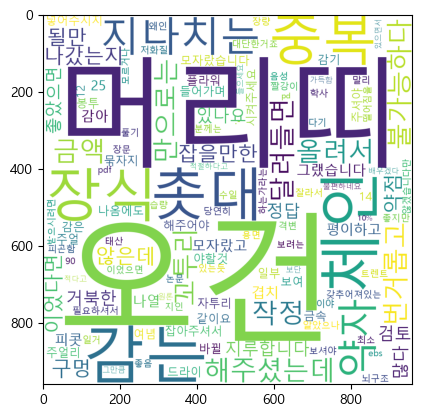

In [112]:
wc = WordCloud(font_path = path, width=480, height=480, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(freq_neg_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드부정(필터링).png')

In [111]:
# 치환 데이터 불러오기
replace_list = pd.read_csv('replace_list.csv', encoding = 'cp949')

In [85]:
len(replace_list)

68

In [93]:
nonreplaced_dict = freq_neg_dict.copy()

In [94]:
replaced_dict = dict()

# 데이터 치환
for freq_neg in freq_neg_dict:
    for i in range(len(replace_list['before_replacement'])):

        # 키 값이 치환되어야 하는 값일 때
        if freq_neg == replace_list['before_replacement'][i]:

            # 해당 키 값의 빈도 수 추출
            value = nonreplaced_dict.pop(freq_neg)

            # 그 값이 딕셔너리 키에 없으면 키로 할당
            if replace_list['after_replacement'][i] not in replaced_dict:
                replaced_dict[replace_list['after_replacement'][i]] = 0

            # 새로운 키 값에 빈도 수 할당
            replaced_dict[replace_list['after_replacement'][i]] += value

In [95]:
# 중복 단어 제거한 부정 후기에서 사용된 단어가 나타난 빈도(원데이터)
sum(freq_neg_dict.values())

131

In [98]:
# 치환된 단어의 총 사용 빈도
sum(replaced_dict.values())

74

In [96]:
# 치환되지 않은 단어의 총 사용 빈도
sum(nonreplaced_dict.values())

57

In [99]:
# 데이터 치환 후 부정 후기에서 사용된 단어가 나타난 빈도
new_neg_dict = dict(replaced_dict, **nonreplaced_dict)

In [101]:
# 빈도 수를 기준으로 내림차순 정렬
rep_freq_neg = sorted(new_neg_dict.items(), key=lambda x: x[1], reverse = True)
rep_freq_neg_dict = dict(rep_freq_neg)
rep_freq_neg_dict

{'재료': 19,
 '좋겠어요': 8,
 '배경지식': 4,
 '많음': 4,
 '예시': 4,
 '평이함': 3,
 '학습량': 3,
 '이론': 3,
 '시험': 2,
 '의문': 2,
 '중복': 2,
 '배움': 2,
 '자료': 2,
 '감는': 2,
 '번거로움': 1,
 '불가능': 1,
 '약점': 1,
 '지루함': 1,
 '거북함': 1,
 '변화': 1,
 '문장': 1,
 '전달력': 1,
 '추천': 1,
 '편집': 1,
 '좋지만': 1,
 '풀이': 1,
 '알았지만': 1,
 '트렌드': 1,
 '적절함': 1,
 '불편함': 1,
 '지나치는': 1,
 '해주셨는데': 1,
 '금액': 1,
 '올려서': 1,
 '작정': 1,
 '달려들면': 1,
 '만으로는': 1,
 '잡을만한': 1,
 '될만': 1,
 '나갔는지': 1,
 '않은데': 1,
 '25': 1,
 '모자랐고': 1,
 '겹치': 1,
 '감아': 1,
 '모자랐습니다': 1,
 '감기': 1,
 '12': 1,
 '감은': 1,
 '넣어주시지': 1,
 '14': 1,
 '봉투': 1,
 '일부': 1,
 '여념': 1,
 '분께는': 1,
 '일거': 1,
 '90': 1,
 '다기': 1,
 '뇌구조': 1,
 '.-': 1,
 '필요하셔서': 1,
 '말리': 1,
 '않겠습니다만': 1,
 '받으시려면': 1,
 '당연히': 1,
 '있는듯': 1,
 '용면': 1,
 '수일': 1,
 '이야': 1,
 'ebs': 1,
 '저화질': 1,
 '피곤함': 1,
 '왜인': 1,
 '떨어짐을': 1,
 '격변': 1,
 '보단': 1,
 '그만큼': 1,
 '적다고': 1,
 '들으세요': 1,
 '있으면서': 1,
 '10%': 1}

In [109]:
wc = WordCloud(font_path = path, width=480, height=480, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(rep_freq_neg_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드부정(치환).png')